# Diabetes

In [1]:
'''
Information about dataset attributes -
Pregnancies: To express the Number of pregnancies
Glucose: To express the Glucose level in blood
BloodPressure: To express the Blood pressure measurement
SkinThickness: To express the thickness of the skin
Insulin: To express the Insulin level in blood
BMI: To express the Body mass index
DiabetesPedigreeFunction: To express the Diabetes percentage
Age: To express the age
Outcome: To express the final result 1 is Yes and 0 is No
'''

'\nInformation about dataset attributes -\nPregnancies: To express the Number of pregnancies\nGlucose: To express the Glucose level in blood\nBloodPressure: To express the Blood pressure measurement\nSkinThickness: To express the thickness of the skin\nInsulin: To express the Insulin level in blood\nBMI: To express the Body mass index\nDiabetesPedigreeFunction: To express the Diabetes percentage\nAge: To express the age\nOutcome: To express the final result 1 is Yes and 0 is No\n'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
daibetes = pd.read_csv("diabetes.csv")
daibetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
features = ['Pregnancies','Glucose' ,'BloodPressure','SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [6]:
# Assuming `daibetes` is your DataFrame
for feature in features:
    print(f"Feature: {feature}")
    print(f"Min value: {daibetes[feature].min()}")
    print(f"Max value: {daibetes[feature].max()}")
    print()

Feature: Pregnancies
Min value: 0
Max value: 17

Feature: Glucose
Min value: 0
Max value: 199

Feature: BloodPressure
Min value: 0
Max value: 122

Feature: SkinThickness
Min value: 0
Max value: 99

Feature: Insulin
Min value: 0
Max value: 846

Feature: BMI
Min value: 0.0
Max value: 67.1

Feature: DiabetesPedigreeFunction
Min value: 0.078
Max value: 2.42

Feature: Age
Min value: 21
Max value: 81



In [ ]:
daibetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
daibetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
daibetes.shape

(768, 9)

In [ ]:
daibetes['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

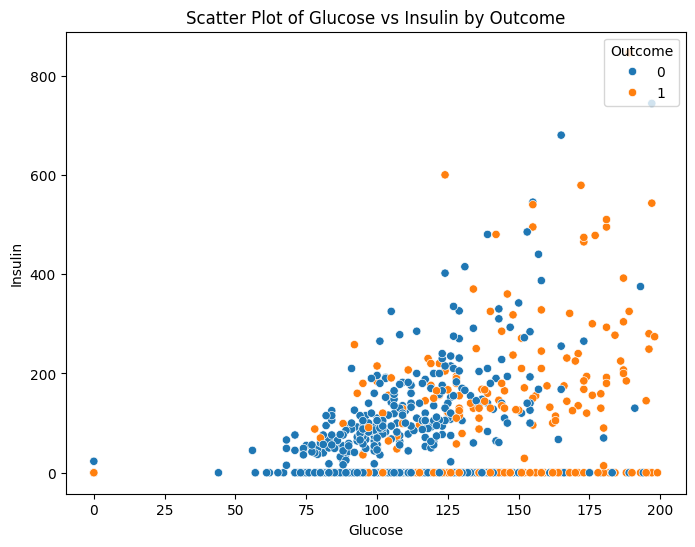

In [ ]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Glucose', y='Insulin', hue='Outcome', data=daibetes)
plt.title('Scatter Plot of Glucose vs Insulin by Outcome')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.legend(title='Outcome', loc='upper right')
plt.show()

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

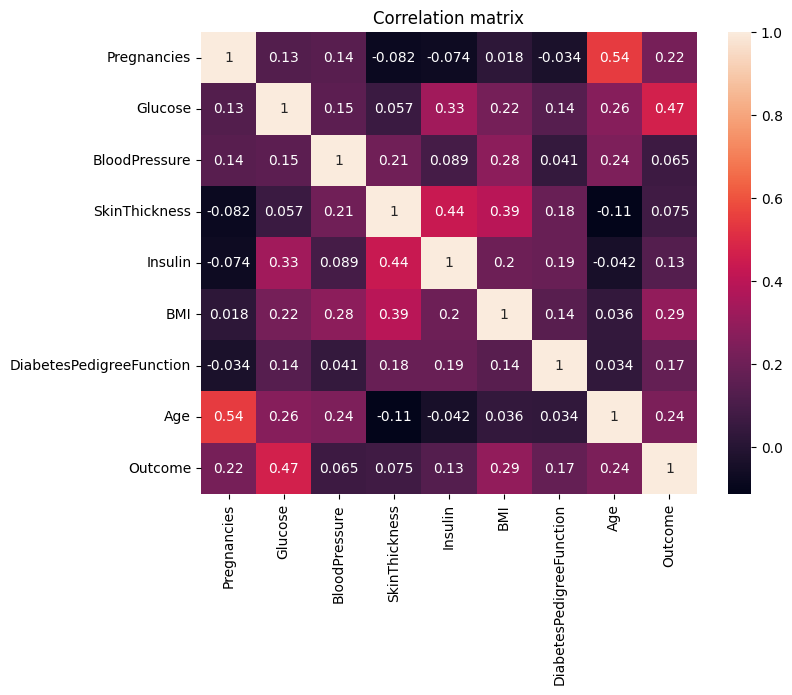

In [ ]:
correlation_matrix = daibetes.corr()

print(correlation_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation matrix")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [ ]:
X = daibetes.drop('Outcome', axis=1)
y = daibetes['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#logistic regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
lr_model_pred = lr_model.predict(X_test)
lr_model_prob = lr_model.predict_proba(X_test)[:, 1]  # For ROC-AUC

print(f"LogisticRegression Performance: \n")
print("accuracy score: ", accuracy_score(y_test,lr_model_pred))
print("ROC-AUC: ", roc_auc_score(y_test,lr_model_prob))

LogisticRegression Performance: 

accuracy score:  0.7532467532467533
ROC-AUC:  0.8146923783287419


In [ ]:
svc_model = SVC(probability=True)
svc_model.fit(X_train,y_train)

SVC(probability=True)

In [ ]:
svc_model_pred = svc_model.predict(X_test)
svc_model_prob = svc_model.predict_proba(X_test)[:, 1]  # For ROC-AUC

print(f"SVC Performance: \n")
print("accuracy score: ", accuracy_score(y_test,svc_model_pred))
print("ROC-AUC: ", roc_auc_score(y_test,svc_model_prob))

SVC Performance: 

accuracy score:  0.7337662337662337
ROC-AUC:  0.805050505050505


In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
rf_model_pred = rf_model.predict(X_test)
rf_model_prob = rf_model.predict_proba(X_test)[:, 1]  # For ROC-AUC

print(f"Random forest Performance: \n")
print("accuracy score: ", accuracy_score(y_test,rf_model_pred))
print("ROC-AUC: ", roc_auc_score(y_test,rf_model_prob))

Random forest Performance: 

accuracy score:  0.7207792207792207
ROC-AUC:  0.8242424242424242


In [ ]:
#GradientBoosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
gb_model_pred = gb_model.predict(X_test)
gb_model_prob = gb_model.predict_proba(X_test)[:, 1]  # For ROC-AUC

print(f"Gradient boosting Performance: \n")
print("accuracy score: ", accuracy_score(y_test,gb_model_pred))
print("ROC-AUC: ", roc_auc_score(y_test,gb_model_prob))

Gradient boosting Performance: 

accuracy score:  0.7467532467532467
ROC-AUC:  0.8084481175390267


In [ ]:
#GradientBoosting
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb_model_pred = xgb_model.predict(X_test)
xgb_model_prob = xgb_model.predict_proba(X_test)[:, 1]  # For ROC-AUC

print(f"XGBoost Performance: \n")
print("accuracy score: ", accuracy_score(y_test,xgb_model_pred))
print("ROC-AUC: ", roc_auc_score(y_test,xgb_model_prob))

XGBoost Performance: 

accuracy score:  0.7077922077922078
ROC-AUC:  0.766574839302112


In [ ]:
import pickle

model_filename = 'diabetes.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(lr_model, file)

print(f"Model saved as {model_filename}")

Model saved as diabetes.pkl
